<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy backtrader akshare  # 安装数据获取和回测库

In [2]:
import akshare as ak

stock_hk_index_daily_sina_df = ak.stock_hk_index_daily_sina(symbol="CES100")
print(stock_hk_index_daily_sina_df)

            date      open      high       low     close      volume
0     2014-12-15  4354.014  4362.220  4331.394  4355.359  1087163017
1     2014-12-16  4334.295  4347.367  4275.529  4280.410  1303011243
2     2014-12-17  4278.770  4280.350  4223.895  4227.100  2002919200
3     2014-12-18  4281.007  4296.184  4264.265  4282.028  1547580777
4     2014-12-19  4347.982  4354.488  4321.534  4331.438  1515374212
...          ...       ...       ...       ...       ...         ...
2498  2025-02-07  4431.462  4526.462  4420.237  4502.023  5888929062
2499  2025-02-10  4522.627  4588.370  4521.865  4581.406  5132076029
2500  2025-02-11  4611.277  4616.518  4517.327  4522.481  3991899141
2501  2025-02-12  4576.675  4641.954  4550.528  4641.954  4723803263
2502  2025-02-13  4673.432  4812.690  4627.931  4652.362  7048302030

[2503 rows x 6 columns]


In [3]:
import akshare as ak

# 获取恒生科技指数的历史数据

hs_tech = ak.stock_hk_index_daily_sina(symbol="HSTECH")

# 打印获取的数据
hs_tech.head(10)


# 选择'date'和'close'列，并重命名
hs_tech = hs_tech[['date', 'close']].rename(columns={'date': 'Date', 'close': 'price'})

# 将'Date'列设置为索引
hs_tech = hs_tech.set_index('Date')

# 打印结果
print(hs_tech)


              price
Date               
2020-08-17  7075.03
2020-08-18  7196.01
2020-08-20  7167.60
2020-08-21  7168.87
2020-08-24  7329.91
...             ...
2025-02-07  5150.35
2025-02-10  5286.66
2025-02-11  5142.31
2025-02-12  5281.18
2025-02-13  5235.28

[1103 rows x 1 columns]


In [4]:
min_date = hs_tech.index.min()
max_date = hs_tech.index.max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2020-08-17
Maximum Date: 2025-02-13


In [5]:
import akshare as ak

stock_hsgt_hist_em_df = ak.stock_hsgt_hist_em(symbol="南向资金")
print(stock_hsgt_hist_em_df)

              日期   当日成交净买额     买入成交额     卖出成交额   历史累计净买额  当日资金流入    当日余额  \
0     2014-11-17   21.3208   22.3811    1.0603  0.002132  -87.32   87.32   
1     2014-11-18    9.3716   10.8311    1.4595  0.003069  -97.00   97.00   
2     2014-11-19    2.6592    3.8092    1.1500  0.003335 -102.47  102.47   
3     2014-11-20    1.8736    2.8150    0.9414  0.003523 -103.04  103.04   
4     2014-11-21    1.7453    3.0867    1.3414  0.003697 -103.14  103.14   
...          ...       ...       ...       ...       ...     ...     ...   
2330  2025-02-07   10.6705  608.6803  598.0098  3.828211     NaN     NaN   
2331  2025-02-10  164.6783  660.4149  495.7366  3.844679     NaN     NaN   
2332  2025-02-11  -88.9811  480.2594  569.2405  3.835780     NaN     NaN   
2333  2025-02-12   75.1158  637.6956  562.5798  3.843292     NaN     NaN   
2334  2025-02-13  -10.2366  790.5533  800.7899  3.842268     NaN     NaN   

              持股市值      领涨股  领涨股-涨跌幅     沪深300  沪深300-涨跌幅    领涨股-代码  
0     0.000000e+0

In [6]:
import akshare as ak
import pandas as pd
import numpy as np
import backtrader as bt
from datetime import datetime

In [7]:

# 获取港股通资金流数据
def get_southbound_flow():
    # 使用AKShare获取南向资金数据
    hk_stock_flow = ak.stock_hsgt_hist_em(symbol="南向资金")
    hk_stock_flow['日期'] = pd.to_datetime(hk_stock_flow['日期'])
    hk_stock_flow = hk_stock_flow.set_index('日期')['当日成交净买额'].rename('southbound_flow')
    return hk_stock_flow


print(get_southbound_flow())
# 合并数据
data = hs_tech.join(get_southbound_flow(), how='left').fillna(method='ffill')

日期
2014-11-17     21.3208
2014-11-18      9.3716
2014-11-19      2.6592
2014-11-20      1.8736
2014-11-21      1.7453
                ...   
2025-02-07     10.6705
2025-02-10    164.6783
2025-02-11    -88.9811
2025-02-12     75.1158
2025-02-13    -10.2366
Name: southbound_flow, Length: 2335, dtype: float64


<ipython-input-7-ebc15161711c>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = hs_tech.join(get_southbound_flow(), how='left').fillna(method='ffill')


VIX 指数是由芝加哥期权交易所 (CBOE) 计算和发布的。它基于标普 500 指数期权的价格，反映了市场对未来 30 天波动性的预期。具体的计算公式比较复杂，涉及到对近月和次月到期期权的加权平均。

计算 VIX 恐慌指数

VIX 指数是由芝加哥期权交易所 (CBOE) 计算和发布的。它基于标普 500 指数期权的价格，反映了市场对未来 30 天波动性的预期。具体的计算公式比较复杂，涉及到对近月和次月到期期权的加权平均。

如果需要自己计算 VIX 指数，可以参考 CBOE 官方发布的白皮书。

简化计算方法：

为了简化计算，可以使用以下近似方法：

* 使用隐含波动率:
可以使用期权定价模型（例如 Black-Scholes 模型）反推出期权的隐含波动率。然后，将近月和次月到期期权的隐含波动率进行加权平均，即可得到 VIX 指数的近似值。

* 使用历史波动率:
可以使用标普 500 指数的历史价格数据计算其历史波动率。然后，将历史波动率进行调整，使其反映市场对未来 30 天波动性的预期。

总结：

获取 VIX 指数最简单的方法是直接从数据提供商那里下载。
如果需要自己计算 VIX 指数，需要参考 CBOE 官方发布的白皮书，或者使用简化计算方法。


In [8]:
import yfinance as yf

# 下载 VIX 数据
vix_data = yf.download("^VIX", start="2013-01-01", end="2025-2-13")

# 选择 'Close' 列作为 VIX 值
vix = vix_data['Close']

print(vix)

[*********************100%***********************]  1 of 1 completed

Ticker           ^VIX
Date                 
2013-01-02  14.680000
2013-01-03  14.560000
2013-01-04  13.830000
2013-01-07  13.790000
2013-01-08  13.620000
...               ...
2025-02-06  15.500000
2025-02-07  16.540001
2025-02-10  15.810000
2025-02-11  16.020000
2025-02-12  15.890000

[3048 rows x 1 columns]


In [9]:
def get_data():
    # 1.获取恒生科技指数数据
    hs_tech = ak.stock_hk_index_daily_sina(symbol="HSTECH")
    hs_tech = hs_tech[['date', 'close']].rename(columns={'date':'Date', 'close':'price'})
    hs_tech['Date'] = pd.to_datetime(hs_tech['Date'])
    hs_tech = hs_tech.set_index('Date').sort_index()

    # 2.获取港股通资金流
    def get_southbound():
        df = ak.stock_hsgt_hist_em(symbol="南向资金")
        df['日期'] = pd.to_datetime(df['日期'])
        return df.set_index('日期')['当日成交净买额'].rename('southbound_flow')

    # 3.获取市场恐慌指数
    # 下载 VIX 数据
    vix_data = yf.download("^VIX", start=hs_tech.index.min(), end=hs_tech.index.max())
    # 选择 'Close' 列作为 VIX 值
    vix = vix_data['Close'].rename('vix')

    # 合并数据
    df = hs_tech.join(get_southbound(), how='left')
    df = df.join(vix, how='left')


    # 数据清洗
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(method='ffill')
    df = df.dropna(subset=['price', 'vix', 'southbound_flow'])  # 确保关键列没有空值

    return df

In [10]:
def get_data():
    """获取恒生科技指数、资金流和VIX数据"""
    try:
        # 1.获取恒生科技指数数据
        hs_tech = ak.stock_hk_index_daily_sina(symbol="HSTECH")
        if hs_tech is None or hs_tech.empty:
            raise ValueError("Failed to get HSTECH data")

        # 处理恒生科技指数数据
        hs_tech['date'] = pd.to_datetime(hs_tech['date'])
        hs_tech = hs_tech[['date', 'close']]
        hs_tech.columns = ['Date', 'price']  # 使用直接赋值替代rename
        hs_tech = hs_tech.set_index('Date').sort_index()

        # 2.获取港股通资金流
        def get_southbound():
            df = ak.stock_hsgt_hist_em(symbol="南向资金")
            if df is None or df.empty:
                raise ValueError("Failed to get southbound flow data")
            df['日期'] = pd.to_datetime(df['日期'])
            southbound = df.set_index('日期')['当日成交净买额']
            southbound.index.name = 'Date'
            southbound.name = 'southbound_flow'  # 使用name属性替代rename
            return southbound

        # 3.获取VIX数据
        start_date = hs_tech.index.min()
        end_date = hs_tech.index.max()

        vix_data = yf.download("^VIX",
                              start=start_date.strftime('%Y-%m-%d'),
                              end=end_date.strftime('%Y-%m-%d'),
                              progress=False)

        if vix_data is None or vix_data.empty:
            raise ValueError("Failed to get VIX data")

        vix = vix_data['Close']
        vix.name = 'vix'  # 使用name属性替代rename

        # 合并数据
        df = pd.DataFrame(index=hs_tech.index)
        df['price'] = hs_tech['price']
        df['southbound_flow'] = get_southbound()
        df['vix'] = vix

        # 数据清洗
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df.fillna(method='ffill')
        df = df.dropna(subset=['price', 'vix', 'southbound_flow'])

        # 验证数据
        if df.empty:
            raise ValueError("No valid data after merging and cleaning")

        print(f"Data shape: {df.shape}")
        print(f"Date range: {df.index.min()} to {df.index.max()}")

        return df

    except Exception as e:
        print(f"Error in get_data(): {str(e)}")
        print("Detailed error information:")
        import traceback
        print(traceback.format_exc())
        return None

# 添加数据验证函数
def validate_dataframe(df):
    """验证数据框的完整性"""
    if df is None or df.empty:
        print("DataFrame is None or empty")
        return False

    required_columns = ['price', 'vix', 'southbound_flow']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Missing columns: {missing_columns}")
        return False

    if df.index.dtype != 'datetime64[ns]':
        print("Index is not datetime type")
        return False

    # 检查数据类型
    expected_types = {
        'price': 'float64',
        'vix': 'float64',
        'southbound_flow': 'float64'
    }

    for col, expected_type in expected_types.items():
        if df[col].dtype != expected_type:
            print(f"Column {col} has wrong type: {df[col].dtype} (expected {expected_type})")
            return False

    return True

# 使用示例
if __name__ == "__main__":
    # 获取数据
    df = get_data()

    # 验证数据
    if validate_dataframe(df):
        print("\nData validation passed")
        print("\nData sample:")
        print(df.head())
        print("\nData description:")
        print(df.describe())
    else:
        print("Data validation failed")

Data shape: (1103, 3)
Date range: 2020-08-17 00:00:00 to 2025-02-13 00:00:00

Data validation passed

Data sample:
              price  southbound_flow        vix
Date                                           
2020-08-17  7075.03          26.4586  21.350000
2020-08-18  7196.01          10.7516  21.510000
2020-08-20  7167.60           3.8219  22.719999
2020-08-21  7168.87          16.4975  22.540001
2020-08-24  7329.91          29.7109  22.370001

Data description:
              price  southbound_flow          vix
count   1103.000000      1103.000000  1103.000000
mean    5157.702187        24.275430    19.882656
std     1786.681800        46.492424     5.468455
min     2801.990000      -199.602900    11.860000
25%     3854.145000        -0.554650    15.670000
50%     4374.900000        20.347700    18.840000
75%     6397.430000        46.457800    23.110001
max    10945.220000       265.927500    40.279999


<ipython-input-10-f08ed835c9ed>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [11]:
class SignalData(bt.feeds.PandasData):
    lines = ('signal',)
    params = (
        ('datetime', None),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', 'price'),
        ('volume', -1),  # 设置为-1而不是None
        ('openinterest', -1),
        ('signal', 'signal'),
    )

def prepare_backtest_data(df):
    """准备回测数据，添加必要的列"""
    df = df.copy()

    # 添加OHLC数据
    df['open'] = df['price']
    df['high'] = df['price']
    df['low'] = df['price']
    df['close'] = df['price']

    # 添加成交量数据（使用虚拟数据）
    df['volume'] = 1000000  # 设置一个固定的成交量

    # 确保没有NaN值
    df = df.ffill().bfill()

    return df

def calculate_factors(df):
    """计算交易信号"""
    df = df.copy()

    # 1.技术指标
    df['ema_30'] = df['price'].ewm(span=30, min_periods=1).mean()
    df['momentum'] = np.where(df['price'] > df['ema_30'], 1, -1)

    # 2.资金流因子
    df['southbound_5ma'] = df['southbound_flow'].rolling(window=5, min_periods=1).mean()
    df['flow_score'] = np.where(df['southbound_flow'] > df['southbound_5ma'], 1, 0)

    # 3.波动率因子
    df['volatility_risk'] = np.where(df['vix'] > 25, 1, 0)

    # 4.政策因子（模拟NLP评分）
    np.random.seed(42)
    df['policy_score'] = np.random.choice([0.5, 0.8, 0.3], size=len(df))

    # 综合信号
    weights = {
        'momentum': 0.4,
        'flow_score': 0.3,
        'volatility_risk': 0.2,
        'policy_score': 0.1
    }

    df['total_score'] = (
        df['momentum'] * weights['momentum'] +
        df['flow_score'] * weights['flow_score'] +
        df['volatility_risk'] * weights['volatility_risk'] +
        df['policy_score'] * weights['policy_score']
    )

    df['signal'] = np.where(df['total_score'] > 0.6, 1,
                           np.where(df['total_score'] < 0.4, -1, 0))

    # 确保没有NaN值
    df = df.ffill().bfill()

    return df

class HSTechStrategy(bt.Strategy):
    params = dict(
        pos_size=0.95,
        stop_loss=0.95
    )

    def __init__(self):
        self.signal = self.datas[0].lines.signal
        self.order = None
        self.price = self.datas[0].close

        # 添加交易日志
        self.log_enabled = True

    def log(self, txt, dt=None):
        if self.log_enabled:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()} {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Comm: {order.executed.comm:.2f}')
            else:
                self.log(f'SELL EXECUTED, Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Comm: {order.executed.comm:.2f}')

        self.order = None

    def next(self):
        if self.order:
            return

        if not self.position:  # 没有持仓
            if self.signal[0] == 1:  # 买入信号
                size = self.broker.getcash() * self.p.pos_size / self.price[0]
                self.log(f'BUY CREATE, {size:.2f} @ Price: {self.price[0]:.2f}')
                self.order = self.buy(size=size)

        else:  # 有持仓
            if self.signal[0] == -1 or self.price[0] < self.position.price * self.p.stop_loss:
                self.log(f'SELL CREATE @ Price: {self.price[0]:.2f}')
                self.order = self.sell(size=self.position.size)

if __name__ == '__main__':
    try:
        # 准备数据
        raw_data = get_data()
        data_df = calculate_factors(raw_data)
        data_df = prepare_backtest_data(data_df)

        # 数据验证
        required_columns = ['open', 'high', 'low', 'close', 'volume', 'signal']
        missing_columns = [col for col in required_columns if col not in data_df.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {missing_columns}")

        if data_df.isnull().any().any():
            raise ValueError("Data contains NaN values")

        # 初始化回测引擎
        cerebro = bt.Cerebro()

        # 添加数据
        data = SignalData(dataname=data_df)
        cerebro.adddata(data)

        # 添加策略
        cerebro.addstrategy(HSTechStrategy)

        # 设置初始资金和手续费
        initial_cash = 100000.0
        cerebro.broker.setcash(initial_cash)
        cerebro.broker.setcommission(commission=0.001)

        # 添加分析器
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0.02)
        cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
        cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

        # 运行回测
        print('初始资金: %.2f' % cerebro.broker.getvalue())
        results = cerebro.run()
        strat = results[0]

        # 输出回测结果
        final_value = cerebro.broker.getvalue()
        print('最终资金: %.2f' % final_value)
        print('总收益率: %.2f%%' % ((final_value/initial_cash - 1) * 100))

        # 获取分析器结果
        sharpe_ratio = strat.analyzers.sharpe.get_analysis()['sharperatio']
        max_drawdown = strat.analyzers.drawdown.get_analysis()['max']['drawdown']

        if not np.isnan(sharpe_ratio):
            print('夏普比率: %.2f' % sharpe_ratio)
        else:
            print('夏普比率: 无法计算')

        print('最大回撤: %.2f%%' % max_drawdown)

        # 绘制回测结果
        cerebro.plot(style='candlestick', barup='red', bardown='green',
                    volup='red', voldown='green', grid=True)

    except Exception as e:
        print(f"回测过程中出现错误: {str(e)}")
        import traceback
        print(traceback.format_exc())

<ipython-input-10-f08ed835c9ed>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Data shape: (1103, 3)
Date range: 2020-08-17 00:00:00 to 2025-02-13 00:00:00
初始资金: 100000.00
2020-08-21 BUY CREATE, 13.25 @ Price: 7168.87
2020-08-24 BUY EXECUTED, Price: 7329.91, Cost: 97134.06, Comm: 97.13
2020-09-07 SELL CREATE @ Price: 7240.96
2020-09-08 SELL EXECUTED, Price: 7123.28, Cost: 97134.06, Comm: 94.40
2020-09-15 BUY CREATE, 12.55 @ Price: 7348.72
2020-09-16 BUY EXECUTED, Price: 7430.09, Cost: 93237.84, Comm: 93.24
2020-09-17 SELL CREATE @ Price: 7301.56
2020-09-18 SELL EXECUTED, Price: 7371.82, Cost: 93237.84, Comm: 92.51
2020-09-18 BUY CREATE, 12.39 @ Price: 7371.82
2020-09-21 BUY EXECUTED, Price: 7195.75, Cost: 89163.92, Comm: 89.16
2020-09-21 SELL CREATE @ Price: 7195.75
2020-09-22 SELL EXECUTED, Price: 7233.32, Cost: 89163.92, Comm: 89.63
2020-10-06 BUY CREATE, 12.49 @ Price: 7336.35
2020-10-07 BUY EXECUTED, Price: 7494.59, Cost: 93594.19, Comm: 93.59
2020-11-11 SELL CREATE @ Price: 7465.44
2020-11-12 SELL EXECUTED, Price: 7706.58, Cost: 93594.19, Comm: 96.24
2020-11

<IPython.core.display.Javascript object>

<ipython-input-10-f08ed835c9ed>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Data shape: (1103, 3)
Date range: 2020-08-17 00:00:00 to 2025-02-13 00:00:00
初始资金: 100000.00
2020-08-21 BUY CREATE, 13.25 @ Price: 7168.87
2020-08-24 BUY EXECUTED, Price: 7329.91, Cost: 97134.06, Comm: 97.13
2020-09-07 SELL CREATE @ Price: 7240.96
2020-09-08 SELL EXECUTED, Price: 7123.28, Cost: 97134.06, Comm: 94.40
2020-09-15 BUY CREATE, 12.55 @ Price: 7348.72
2020-09-16 BUY EXECUTED, Price: 7430.09, Cost: 93237.84, Comm: 93.24
2020-09-17 SELL CREATE @ Price: 7301.56
2020-09-18 SELL EXECUTED, Price: 7371.82, Cost: 93237.84, Comm: 92.51
2020-09-18 BUY CREATE, 12.39 @ Price: 7371.82
2020-09-21 BUY EXECUTED, Price: 7195.75, Cost: 89163.92, Comm: 89.16
2020-09-21 SELL CREATE @ Price: 7195.75
2020-09-22 SELL EXECUTED, Price: 7233.32, Cost: 89163.92, Comm: 89.63
2020-10-06 BUY CREATE, 12.49 @ Price: 7336.35
2020-10-07 BUY EXECUTED, Price: 7494.59, Cost: 93594.19, Comm: 93.59
2020-11-11 SELL CREATE @ Price: 7465.44
2020-11-12 SELL EXECUTED, Price: 7706.58, Cost: 93594.19, Comm: 96.24
2020-11

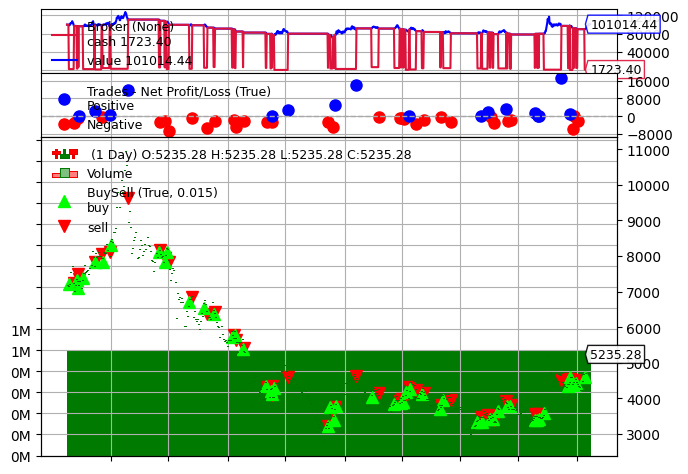

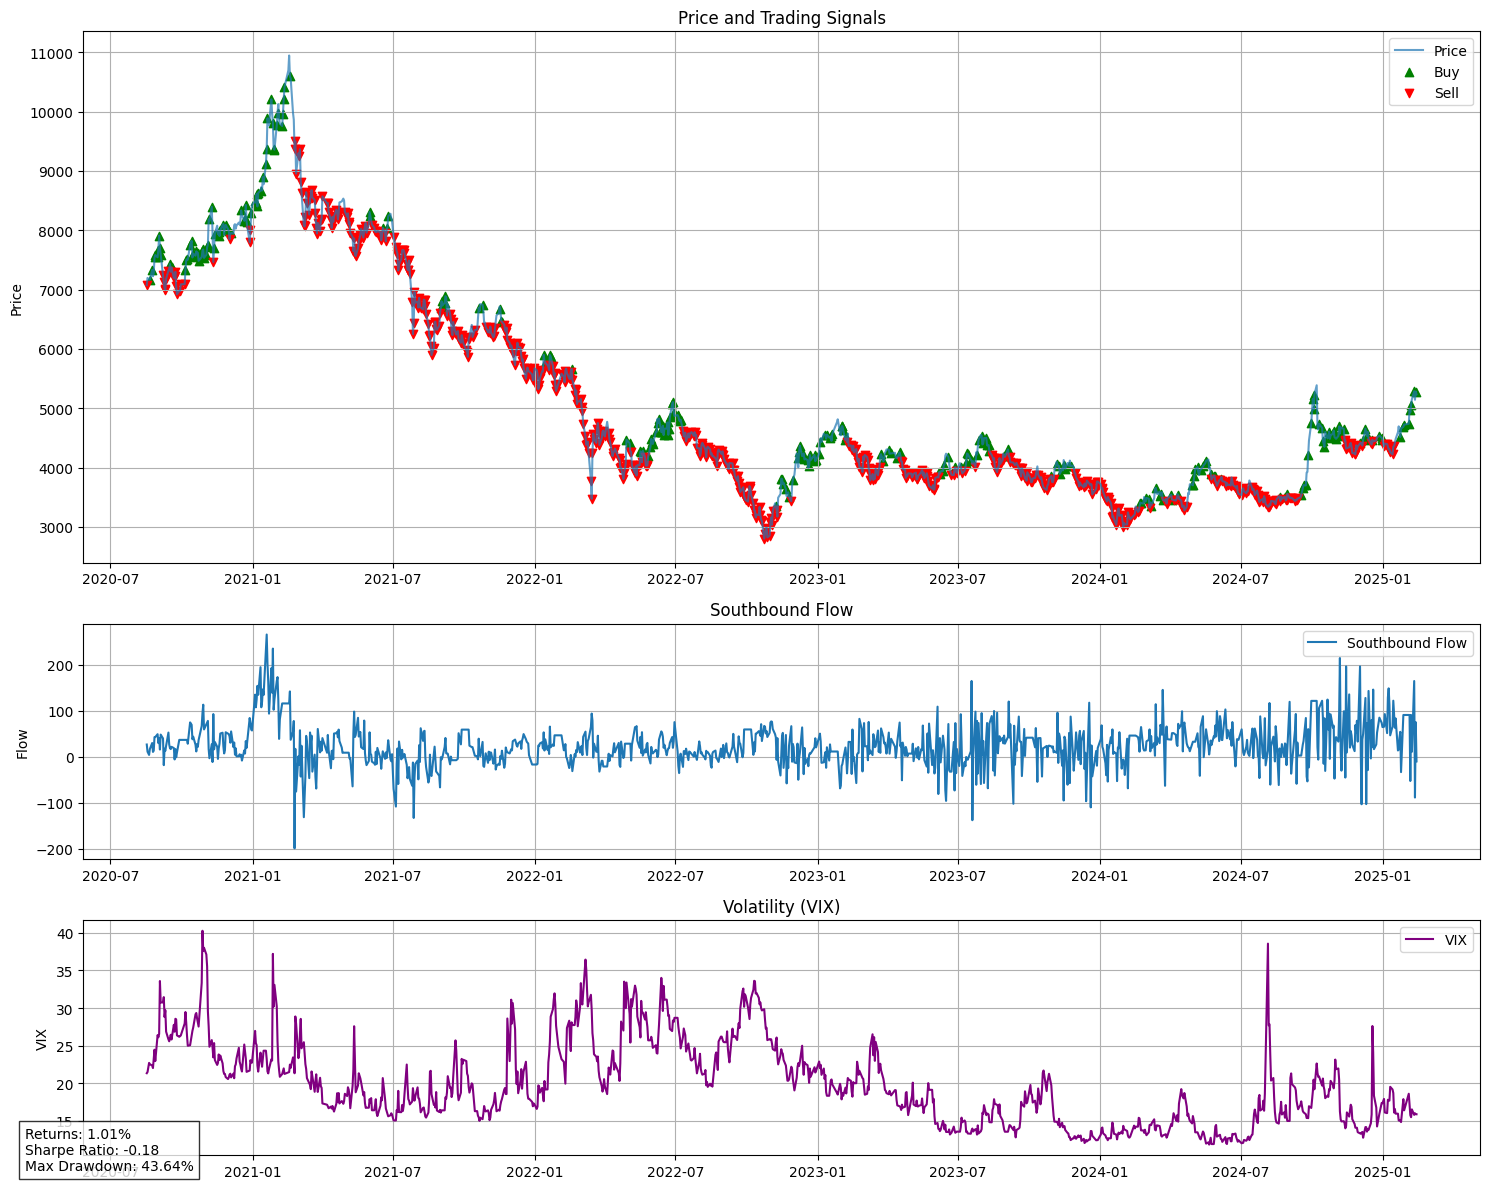

<IPython.core.display.Javascript object>

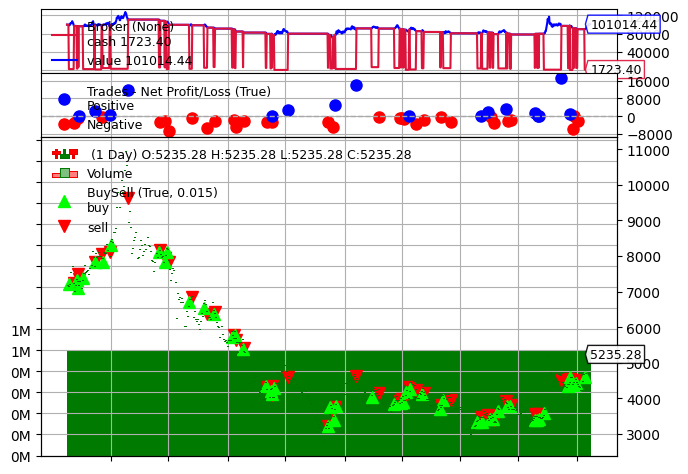

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
class SignalData(bt.feeds.PandasData):
    lines = ('signal',)
    params = (
        ('datetime', None),
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', 'price'),
        ('volume', -1),  # 设置为-1而不是None
        ('openinterest', -1),
        ('signal', 'signal'),
    )

def prepare_backtest_data(df):
    """准备回测数据"""
    df = df.copy()

    # 添加OHLC数据
    df['open'] = df['price']
    df['high'] = df['price']
    df['low'] = df['price']
    df['close'] = df['price']

    # 添加成交量数据（使用虚拟数据）
    df['volume'] = 1000000  # 设置一个固定的成交量

    # 确保没有NaN值
    df = df.ffill().bfill()

    return df

def calculate_factors(df):
    """计算交易信号"""
    df = df.copy()

    # 1.技术指标
    df['ema_30'] = df['price'].ewm(span=30, min_periods=1).mean()
    df['momentum'] = np.where(df['price'] > df['ema_30'], 1, -1)

    # 2.资金流因子
    df['southbound_5ma'] = df['southbound_flow'].rolling(window=5, min_periods=1).mean()
    df['flow_score'] = np.where(df['southbound_flow'] > df['southbound_5ma'], 1, 0)

    # 3.波动率因子
    df['volatility_risk'] = np.where(df['vix'] > 25, 1, 0)

    # 4.政策因子（模拟NLP评分）
    np.random.seed(42)
    df['policy_score'] = np.random.choice([0.5, 0.8, 0.3], size=len(df))

    # 综合信号
    weights = {
        'momentum': 0.4,
        'flow_score': 0.3,
        'volatility_risk': 0.2,
        'policy_score': 0.1
    }

    df['total_score'] = (
        df['momentum'] * weights['momentum'] +
        df['flow_score'] * weights['flow_score'] +
        df['volatility_risk'] * weights['volatility_risk'] +
        df['policy_score'] * weights['policy_score']
    )

    df['signal'] = np.where(df['total_score'] > 0.6, 1,
                           np.where(df['total_score'] < 0.4, -1, 0))

    # 确保没有NaN值
    df = df.ffill().bfill()

    return df

class HSTechStrategy(bt.Strategy):
    params = dict(
        pos_size=0.95,  # 每次开仓比例
        stop_loss=0.95  # 现价比例止损
    )

    def __init__(self):
        self.signal = self.datas[0].lines.signal
        self.order = None
        self.price = self.datas[0].close

        # 添加交易日志
        self.log_enabled = True

    def log(self, txt, dt=None):
        if self.log_enabled:
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()} {txt}')

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY EXECUTED, Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Comm: {order.executed.comm:.2f}')
            else:
                self.log(f'SELL EXECUTED, Price: {order.executed.price:.2f}, Cost: {order.executed.value:.2f}, Comm: {order.executed.comm:.2f}')

        self.order = None

    def next(self):
        if self.order:
            return

        if not self.position:  # 没有持仓
            if self.signal[0] == 1:  # 买入信号
                size = self.broker.getcash() * self.p.pos_size / self.price[0]
                self.log(f'BUY CREATE, {size:.2f} @ Price: {self.price[0]:.2f}')
                self.order = self.buy(size=size)

        else:  # 有持仓
            if self.signal[0] == -1 or self.price[0] < self.position.price * self.p.stop_loss:  # 卖出信号或者止损信号
                self.log(f'SELL CREATE @ Price: {self.price[0]:.2f}')
                self.order = self.sell(size=self.position.size)

def plot_backtest_results(data_df, results, initial_cash):
    """绘制回测结果的详细图表"""
    fig = plt.figure(figsize=(15, 12))

    # 1. 价格和信号
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=2)
    ax1.plot(data_df.index, data_df['price'], label='Price', alpha=0.7)

    # 标记买入点和卖出点
    buy_signals = data_df[data_df['signal'] == 1].index
    sell_signals = data_df[data_df['signal'] == -1].index

    ax1.scatter(buy_signals, data_df.loc[buy_signals, 'price'],
                marker='^', color='g', label='Buy', alpha=1)
    ax1.scatter(sell_signals, data_df.loc[sell_signals, 'price'],
                marker='v', color='r', label='Sell', alpha=1)

    ax1.set_title('Price and Trading Signals')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # 2. 资金流
    ax2 = plt.subplot2grid((4, 1), (2, 0))
    ax2.plot(data_df.index, data_df['southbound_flow'], label='Southbound Flow')
    ax2.set_title('Southbound Flow')
    ax2.set_ylabel('Flow')
    ax2.legend()
    ax2.grid(True)

    # 3. 波动率
    ax3 = plt.subplot2grid((4, 1), (3, 0))
    ax3.plot(data_df.index, data_df['vix'], label='VIX', color='purple')
    ax3.set_title('Volatility (VIX)')
    ax3.set_ylabel('VIX')
    ax3.legend()
    ax3.grid(True)

    # 添加回测结果文本
    strat = results[0]
    final_value = strat.broker.getvalue()
    returns_pct = ((final_value/initial_cash - 1) * 100)
    sharpe = strat.analyzers.sharpe.get_analysis()['sharperatio']
    max_dd = strat.analyzers.drawdown.get_analysis()['max']['drawdown']

    text = f'Returns: {returns_pct:.2f}%\n'
    text += f'Sharpe Ratio: {sharpe:.2f}\n'
    text += f'Max Drawdown: {max_dd:.2f}%'

    plt.figtext(0.02, 0.02, text, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    try:
        # 准备数据
        raw_data = get_data()
        data_df = calculate_factors(raw_data)
        data_df = prepare_backtest_data(data_df)

        # 数据验证
        required_columns = ['open', 'high', 'low', 'close', 'volume', 'signal']
        missing_columns = [col for col in required_columns if col not in data_df.columns]
        if missing_columns:
            raise ValueError(f"Missing columns: {missing_columns}")

        if data_df.isnull().any().any():
            raise ValueError("Data contains NaN values")

        # 初始化回测引擎
        cerebro = bt.Cerebro()

        # 添加数据
        data = SignalData(dataname=data_df)
        cerebro.adddata(data)

        # 添加策略
        cerebro.addstrategy(HSTechStrategy)

        # 设置初始资金和手续费
        initial_cash = 100000.0
        cerebro.broker.setcash(initial_cash)
        cerebro.broker.setcommission(commission=0.001)

        # 添加分析器
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe', riskfreerate=0.02)
        cerebro.addanalyzer(bt.analyzers.Returns, _name='returns')
        cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')

        # 运行回测
        print('初始资金: %.2f' % cerebro.broker.getvalue())
        results = cerebro.run()
        strat = results[0]

        # 输出回测结果
        final_value = cerebro.broker.getvalue()
        print('最终资金: %.2f' % final_value)
        print('总收益率: %.2f%%' % ((final_value/initial_cash - 1) * 100))

        # 获取分析器结果
        sharpe_ratio = strat.analyzers.sharpe.get_analysis()['sharperatio']
        max_drawdown = strat.analyzers.drawdown.get_analysis()['max']['drawdown']

        if not np.isnan(sharpe_ratio):
            print('夏普比率: %.2f' % sharpe_ratio)
        else:
            print('夏普比率: 无法计算')

        print('最大回撤: %.2f%%' % max_drawdown)

        ## 绘制回测结果
        #cerebro.plot(style='candlestick', barup='red', bardown='green',
        #            volup='red', voldown='green', grid=True)

        # 绘制回测结果
        plot_backtest_results(data_df, results, initial_cash)

        # 也可以同时显示 backtrader 的原生图表
        cerebro.plot(style='candlestick',
                    barup='red',
                    bardown='green',
                    volup='red',
                    voldown='green',
                    grid=True,
                    volume=True)
        plt.show()

    except Exception as e:
        print(f"回测过程中出现错误: {str(e)}")
        import traceback
        print(traceback.format_exc())

In [13]:
import pandas as pd

def get_northbound_flow():
    """获取北向资金数据"""
    df = ak.stock_hsgt_hist_em(symbol="北向资金")
    df['日期'] = pd.to_datetime(df['日期'])
    return df.set_index('日期')['当日成交净买额'].rename('northbound_flow')

print(get_northbound_flow())

日期
2014-11-17    120.8233
2014-11-18     47.1967
2014-11-19     24.9677
2014-11-20     21.4194
2014-11-21     21.9953
                ...   
2025-02-07         NaN
2025-02-10         NaN
2025-02-11         NaN
2025-02-12         NaN
2025-02-13         NaN
Name: northbound_flow, Length: 2374, dtype: float64
